<a href="https://colab.research.google.com/github/IanSteenstra/Financial-Model/blob/master/Numerai_Financial_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Numerai XGBoost Model

Notes:
1. Creat GridSearch: https://blog.cambridgespark.com/hyperparameter-tuning-in-xgboost-4ff9100a3b2f
2. Would it be helpful to predict which features will b

In [1]:
!pip install pandas sklearn numerapi
!pip install xgboost
!pip install --upgrade matplotlib graphviz

  Using cached matplotlib-3.3.4-cp37-cp37m-win_amd64.whl (8.5 MB)
  Using cached graphviz-0.16-py2.py3-none-any.whl (19 kB)


## Imports

In [3]:
import pandas as pd
import numerapi
import sklearn.linear_model
import os
from numpy import loadtxt
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import random

In C:\Users\steen\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\steen\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\steen\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\steen\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\steen\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

## Data Initialization

In [4]:
cwd = os.getcwd()

In [5]:
training_data = pd.read_csv(cwd + "\\data\\numerai_training_data.csv")
training_data.head()

,id,era,data_type,feature_intelligence1,feature_intelligence2,feature_intelligence3,feature_intelligence4,feature_intelligence5,feature_intelligence6,feature_intelligence7,...,feature_wisdom38,feature_wisdom39,feature_wisdom40,feature_wisdom41,feature_wisdom42,feature_wisdom43,feature_wisdom44,feature_wisdom45,feature_wisdom46,target
0,n000315175b67977,era1,train,0.00,0.50,0.25,0.00,0.5,0.25,0.25,...,1.00,1.00,0.75,0.50,0.75,0.50,1.00,0.50,0.75,0.50
1,n0014af834a96cdd,era1,train,0.00,0.00,0.00,0.25,0.5,0.00,0.00,...,1.00,1.00,0.00,0.00,0.75,0.25,0.00,0.25,1.00,0.25
2,n001c93979ac41d4,era1,train,0.25,0.50,0.25,0.25,1.0,0.75,0.75,...,0.25,0.50,0.00,0.00,0.50,1.00,0.00,0.25,0.75,0.25
3,n0034e4143f22a13,era1,train,1.00,0.00,0.00,0.50,0.5,0.25,0.25,...,1.00,1.00,0.75,0.75,1.00,1.00,0.75,1.00,1.00,0.25
4,n00679d1a636062f,era1,train,0.25,0.25,0.25,0.25,0.0,0.25,0.50,...,0.75,0.75,0.25,0.50,0.75,0.00,0.50,0.25,0.75,0.75


In [6]:
tournament_data = pd.read_csv(cwd + "\\data\\numerai_tournament_data.csv")
tournament_data.head()

,id,era,data_type,feature_intelligence1,feature_intelligence2,feature_intelligence3,feature_intelligence4,feature_intelligence5,feature_intelligence6,feature_intelligence7,...,feature_wisdom38,feature_wisdom39,feature_wisdom40,feature_wisdom41,feature_wisdom42,feature_wisdom43,feature_wisdom44,feature_wisdom45,feature_wisdom46,target
0,n0003aa52cab36c2,era121,validation,0.25,0.75,0.50,0.50,0.0,0.75,0.5,...,0.75,0.75,1.00,0.75,0.50,0.5,1.0,0.00,0.00,0.25
1,n000920ed083903f,era121,validation,0.75,0.50,0.75,1.00,0.5,0.00,0.0,...,0.50,0.50,0.75,1.00,0.75,0.5,0.5,0.50,0.50,0.50
2,n0038e640522c4a6,era121,validation,1.00,0.00,0.00,1.00,1.0,1.00,1.0,...,0.00,0.00,0.50,0.25,0.00,0.0,0.5,0.50,0.00,1.00
3,n004ac94a87dc54b,era121,validation,0.75,1.00,1.00,0.50,0.0,0.00,0.0,...,0.00,0.00,0.00,0.25,0.00,0.0,0.0,0.25,0.25,0.50
4,n0052fe97ea0c05f,era121,validation,0.25,0.50,0.50,0.25,1.0,0.50,0.5,...,0.50,0.75,0.00,0.00,0.75,1.0,0.0,0.25,1.00,0.75


In [ ]:
combined_data = pd.concat([training_data, tournament_data])
combined_data.head()
combined_data.tail()

In [7]:
feature_cols = training_data.columns[training_data.columns.str.startswith('feature')]

In [8]:
training_features = training_data[feature_cols]

## XGBoost Training

In [9]:
# Training XGBoost Model
model = XGBClassifier()
model.fit(training_features, training_data.target)

C:\Users\steen\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:51:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)

In [ ]:
# Combined XGBoost Model for submission
features = combined_data[feature_cols]
combined_model = XGBClassifier()
combined_model.fit(features, combined_data.target)

## Results

In [10]:
live_features = tournament_data[feature_cols]
predictions = model.predict(live_features)

In [11]:
predictions_df = tournament_data["id"].to_frame()
predictions_df["prediction_kazutsugi"] = predictions
predictions_df = predictions_df

In [14]:
MSE = mean_squared_error(y_true = tournament_data.target.fillna(random.random()), y_pred = predictions_df.prediction_kazutsugi)
MSE

0.0793519833795724

## Feature Graphs

(<Figure size 1440x7200 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x23c4080acc8>)

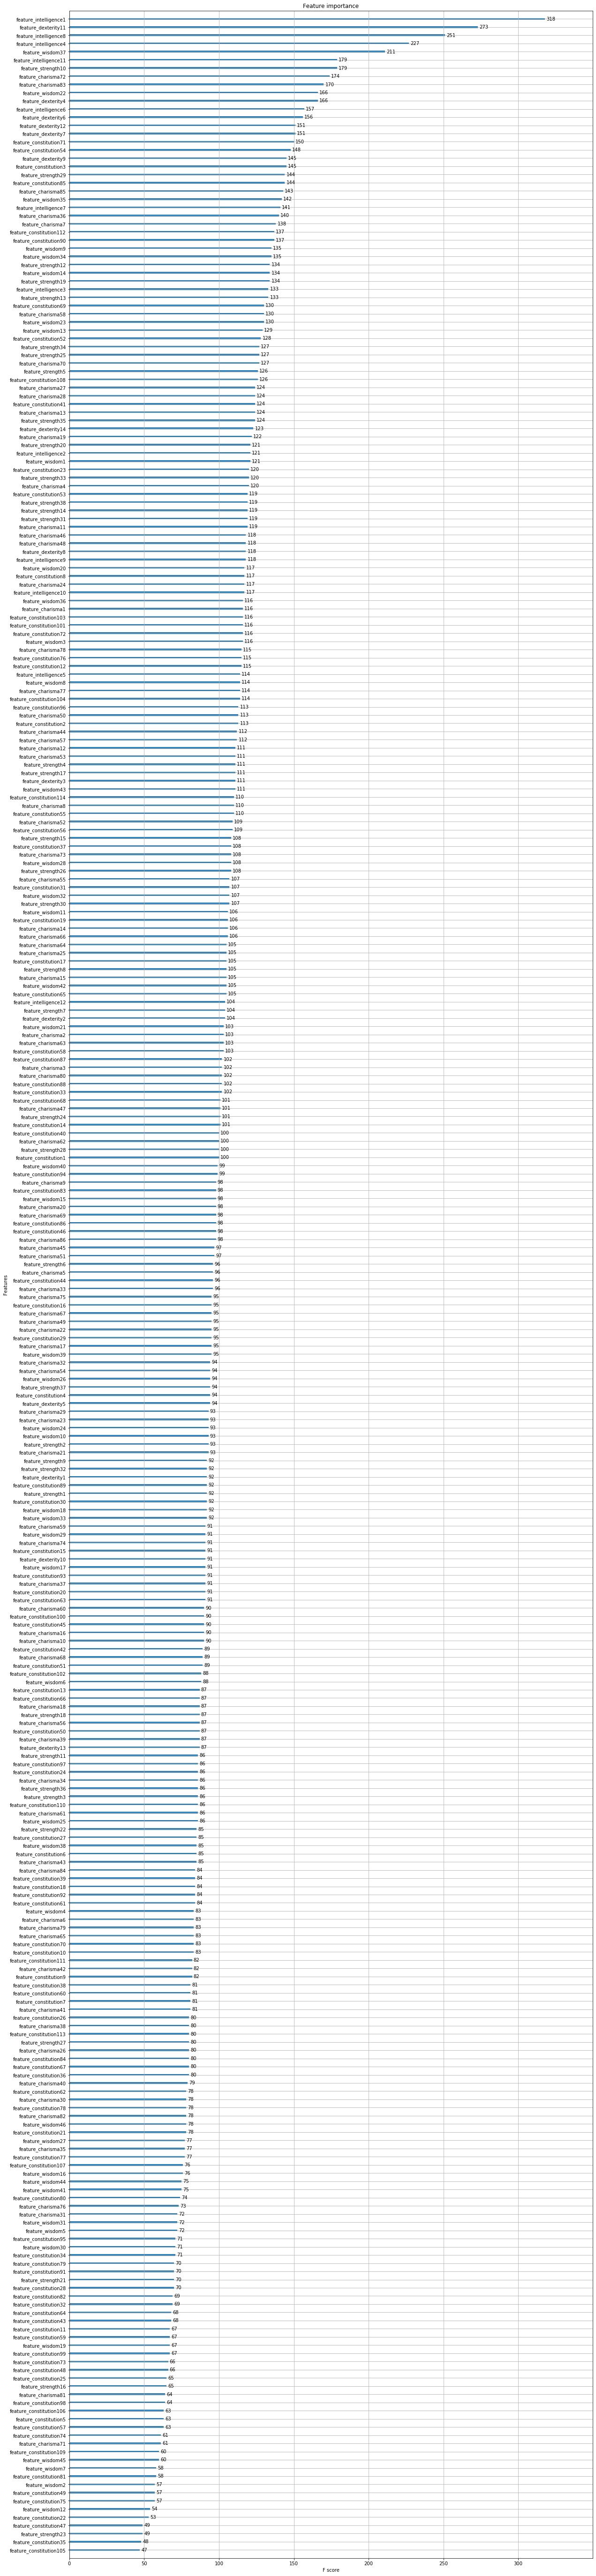

In [77]:
plt.figure(figsize=(20,100)), xgb.plot_importance(model, ax=plt.gca())

In [ ]:
plt.figure(figsize=(20,15)), xgb.plot_tree(model, ax=plt.gca())

## Submission

In [ ]:
sub_predictions = combined_model.predict(live_features)
sub_predictions_df = tournament_data["id"].to_frame()
sub_predictions_df["prediction_kazutsugi"] = sub_predictions

In [12]:
public_id = "RIG7WDCZEIHYESQSHTH75SHFKOI63RQT"
secret_key = "ESEBLQQQLNJEEJEZQFHKTDPY4O6W3O5RXTHQ5ZYEE4D54QUCVBTW7YOFRD5L5DJ7"
model_id = "88405471-4fb1-409b-a070-0748f02bd828"
napi = numerapi.NumerAPI(public_id=public_id, secret_key=secret_key)

In [13]:
predictions_df.to_csv(cwd + "\\data\\predictions.csv", index=False)
submission_id = napi.upload_predictions(cwd + "\\data\\predictions.csv", model_id=model_id)

2021-02-14 00:10:06,402 INFO numerapi.base_api: uploading predictions...
